In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Load CSVs

In [2]:
study_programshs23 = pd.read_csv("/content/VVZ_HS23_study_programs.csv", encoding="utf-8")
moduleshs23 = pd.read_csv("/content/VVZ_HS23_modules.csv",encoding="utf-16")
time_schedulehs23 = pd.read_csv("/content/VVZ_HS23_time_schedule.csv")

study_programshs24 = pd.read_csv("/content/VVZ_HS24_study_programs.csv", encoding="utf-16")
moduleshs24 = pd.read_csv("/content/VVZ_HS24_modules.csv",encoding="utf-16")
time_schedulehs24 = pd.read_csv("/content/VVZ_HS24_time_schedule.csv")

study_programsfs23 = pd.read_csv("/content/VVZ_FS23_study_programs.csv", encoding="utf-8")
modulesfs23 = pd.read_csv("/content/VVZ_FS23_modules.csv",encoding="utf-16")
time_schedulefs23 = pd.read_csv("/content/VVZ_FS23_time_schedule.csv")

study_programsfs24 = pd.read_csv("/content/VVZ_FS24_study_programs.csv", encoding="utf-8")
modulesfs24 = pd.read_csv("/content/VVZ_FS24_modules.csv",encoding="utf-16")
time_schedulefs24 = pd.read_csv("/content/VVZ_FS24_time_schedule.csv")


Shows Headers

In [3]:
study_programshs24.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [4]:
study_programsfs24.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Area Arabic,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
1,Area Chinese,NaN,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
2,Area German as a foreign language,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
3,Area English,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich
4,Area French,German,NaN,Language Center of UZH and ETH Zurich,NaN,NaN,Language Center of UZH and ETH Zurich


In [5]:
moduleshs24.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,BIO 780 Museum Internship,MNF,BIO780,Praktikum,4,Caroline Sonja Weckerle,This module is open for students of the Mono o...,NaN,"Final report or product, graded. In English or...","1-6, Half Grades Given",Can't be repeated,1 Semester (Every Semester),not bookable,not cancelable
1,Research Seminar: Political Communication,PHF,249-700,Module,18,Thomas Zerback,Multivariate Statistik erfolgreich absolviert,NaN,Portfolio,"1-6, Half Grades Given","repeatable once, book again",2 Semesters (Begins in Spring Semester),NaN,NaN
2,Fundamental Texts in Romance Linguistics,PHF,430-003,Module,6,Johannes Kabatek,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
3,Fundamental Texts in French Linguistics,PHF,430-004,Module,3,Martin-Dietrich Glessgen,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00
4,Fundamental Texts in Italian Linguistics,PHF,430-005,Module,3,Michele Loporcaro,erfolgreich absolvierte Module aus der Gruppe ...,NaN,mündliche Prüfung,"1-6, Half Grades Given","repeatable once, book again",1 Semester (Every Semester),from We 14.08.2024 10:00 to Tu 08.10.2024 24:00,from We 14.08.2024 10:00 to Tu 08.10.2024 24:00


In [6]:
modulesfs24.head()

,Name,Faculty,Number,Type,ECTS,Responsible instructor,Prerequisites,Prior Knowledge,Assessment,Grading Scale,Repeatability,Offer pattern,Booking Deadline/Period,Cancellation Deadline
0,CHE 323 Reaction Mechanisms and Kinetics,MNF,CHE323,Lecture with Practical Exercises,4,Jason Philip Holland,NaN,NaN,written exam after the end of the semester,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
1,CHE 325 Solid State and Materials Chemistry,MNF,CHE325,Lecture with Practical Exercises,4,Greta R. Patzke,NaN,NaN,graded exam at the end of the semester,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
2,Functional Foot Trimming in Cattle,VSF,W004,Block Course,2,Karl Nuss,Organblock Bewegungsapparat erfolgreich absolv...,NaN,Klauenkurs ohne Prüfung: 1 ECTS Credits,Pass/Fail,Can be repeated once,1 Semester (Every Spring Semester),not bookable,not cancelable
3,PHY 123 Mechanical workshop II,MNF,PHY123,Block Course,1,Andreas Schilling,PHY113 Werkstattkurs I,NaN,Aktive Mitarbeit,Pass/Fail,Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00
4,MAT 183 Stochastics for Natural Sciences,MNF,MAT183,Lecture with Practical Exercises,6,Reinhard Furrer,NaN,NaN,- Übungen: 60% von den Standard-Übungen,"1-6, Half Grades Given",Can be repeated once,1 Semester (Every Spring Semester),from We 17.01.2024 10:00 to Tu 12.03.2024 24:00,from We 17.01.2024 10:00 to Tu 23.04.2024 24:00


In [7]:
time_schedulehs24.head()


,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forschungsseminar Protein Engineering,BCH802,Forschungsseminar,Andreas Plückthun,English,NaN,Thursday,Morning,8.0,12.0
2,Research Seminar Protein Dynamics (Progress Re...,BCH805,Forschungsseminar,Benjamin Schuler,English,NaN,Monday,Afternoon,13.0,15.0
3,Research seminars,BCH405,Seminar,"Amedeo Caflisch, Raimund Dutzler, Martin Jinek...",English,BCH 405 Research seminars,Thursday,Afternoon,16.0,18.0
4,Blockcourse: Social science Research projects,44LM001,Block Course,Dorothea Lüddeckens,German,Social science Research projects,NaN,NaN,NaN,NaN


In [8]:
time_schedulefs24.head()

,Event Name,Event Code,Event Type,Instructor,Course Languages,Component of Module,Weekday,Daytime,Start Time,End Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Virologie,.335_vr,Course,"Cornel Fraefel, Julia Lechmann, Anna Sophie Ra...",German,Virology,NaN,NaN,NaN,NaN
2,Anatomy Applied,.345_aa,Lecture with Practical Exercises,"Mariusz Pawel Kowalewski, Giuliano Mario Corte...",German,Anatomy applied,NaN,NaN,NaN,NaN
3,"Epidemiology, Biostatistics",.355_eb,Course,"Paul Torgerson, Sonja Sybille Hartnack","German, English","Epidemiology, Biostatistics",NaN,NaN,NaN,NaN
4,Communication in Challenging Situations,.365_kk,Seminar,Thomas Lutz,German,Communication,NaN,NaN,NaN,NaN


In [9]:
def merge_df(module, time_sch):
  merged_df = pd.merge(module, time_sch, left_on="Number", right_on="Event Code", how="inner")

  df = merged_df[["Faculty", "Event Code", "Responsible instructor", "Instructor"]]
  return df

df_hs24 = merge_df(moduleshs24, time_schedulehs24)
df_hs23 = merge_df(moduleshs23, time_schedulehs23)

df_fs24 = merge_df(modulesfs24, time_schedulefs24)
df_fs23 = merge_df(modulesfs23, time_schedulefs23)


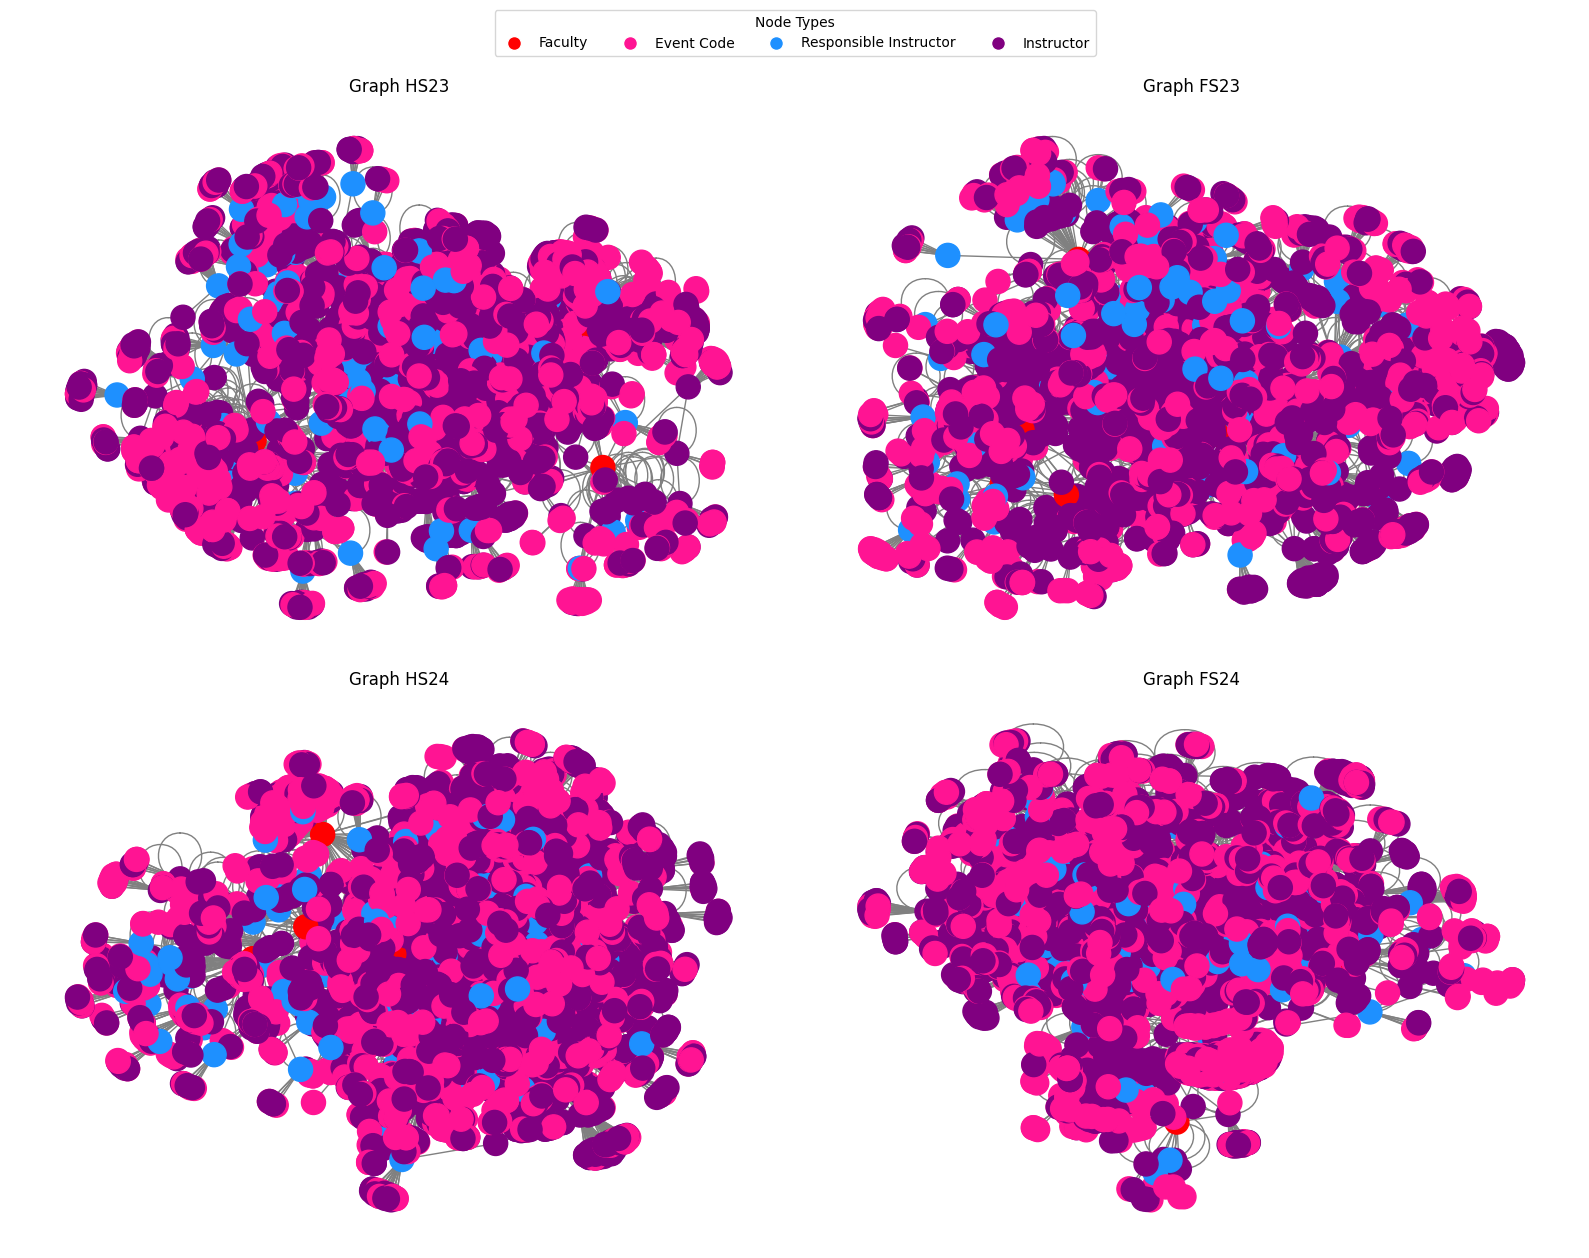

In [18]:

def create_graph(new_Graph, df):
    for _, row in df.iterrows():
        faculty = row['Faculty']
        event_code = row['Event Code']
        responsible_instructor = row['Responsible instructor']

        new_Graph.add_node(faculty, type="Faculty")
        new_Graph.add_node(event_code, type="Event Code")
        new_Graph.add_node(responsible_instructor, type="Responsible Instructor")

        # faculty to responsible instructor
        new_Graph.add_edge(faculty, responsible_instructor)

        # Connect event code to responsible instructor
        new_Graph.add_edge(event_code, responsible_instructor)

        # Add edges for instructors to responsible instructor
        if isinstance(row['Instructor'], str):
            instructors = row['Instructor'].split(", ")
            for instructor in instructors:
                new_Graph.add_node(instructor, type="Instructor")
                new_Graph.add_edge(responsible_instructor, instructor)

    # Assign colors based on node types
    color_map = []
    node_legend = {
        "Faculty": "red",
        "Event Code": "deeppink",
        "Responsible Instructor": "dodgerblue",
        "Instructor": "purple",
    }
    for node in new_Graph.nodes(data=True):
        node_type = node[1].get("type")
        color_map.append(node_legend.get(node_type, "gray"))

    return new_Graph, color_map, node_legend

# all graphs
Graph_hs23 = nx.Graph()
Graph_fs23 = nx.Graph()
Graph_hs24 = nx.Graph()
Graph_fs24 = nx.Graph()

graphs_and_labels = [
    (Graph_hs23, df_hs23, "HS23"),
    (Graph_fs23, df_fs23, "FS23"),
    (Graph_hs24, df_hs24, "HS24"),
    (Graph_fs24, df_fs24, "FS24"),
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

node_legend = None

for ax, (graph, df, label) in zip(axes, graphs_and_labels):
    graph, color_map, node_legend = create_graph(graph, df)
    pos = nx.spring_layout(graph, seed=42)
    nx.draw_networkx(
        graph, pos,
        with_labels=False, node_size=300, font_size=8,
        node_color=color_map, edge_color='gray',
        ax=ax
    )
    ax.set_title(f'Graph {label}')
    ax.axis('off')

# single legend
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=node_type,
               markersize=10, markerfacecolor=color)
    for node_type, color in node_legend.items()
]
fig.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=len(node_legend),
    title="Node Types",
    fontsize='medium'
)

plt.tight_layout()
plt.show()

In [27]:
def get_graph_size(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = (2 * num_edges / num_nodes) if num_nodes > 0 else 0
    return num_nodes, num_edges, avg_degree

graphs = [Graph_hs23, Graph_fs23, Graph_hs24, Graph_fs24]
graph_labels = ["HS23", "FS23", "HS24", "FS24"]

for graph, label in zip(graphs, graph_labels):
    num_nodes, num_edges, avg_degree = get_graph_size(graph)
    print(f"For graph {label}: {num_nodes} nodes, {num_edges} edges, average degree = {avg_degree:.2f}")

For graph HS23: 3042 nodes, 4518 edges, average degree = 2.97
For graph FS23: 3031 nodes, 4388 edges, average degree = 2.90
For graph HS24: 3152 nodes, 4513 edges, average degree = 2.86
For graph FS24: 2917 nodes, 4261 edges, average degree = 2.92


Results for HS23:

Faculty MNF: Total Instructors: 196
Faculty MEF: Total Instructors: 208
Faculty Language Courses: Total Instructors: 136
Faculty VSF: Total Instructors: 138
Faculty PHF: Total Instructors: 202
Faculty WWF: Total Instructors: 130
Faculty RWF: Total Instructors: 152
Faculty THF: Total Instructors: 151
Faculty Transdisciplinary Studies: Total Instructors: 33


Results for FS23:

Faculty MNF: Total Instructors: 270
Faculty MEF: Total Instructors: 370
Faculty Language Courses: Total Instructors: 221
Faculty VSF: Total Instructors: 247
Faculty WWF: Total Instructors: 99
Faculty PHF: Total Instructors: 264
Faculty RWF: Total Instructors: 222
Faculty Transdisciplinary Studies: Total Instructors: 31
Faculty THF: Total Instructors: 226


Results for HS24:

Faculty MNF: Total Instructors: 70
Faculty VSF: Total Instructors: 11
Faculty nan: Total Instructors: 18
Faculty MEF: Total Instructors: 78
Faculty Language Courses: Total Instructors: 0
Faculty PHF: Total Instructors: 62
Fa

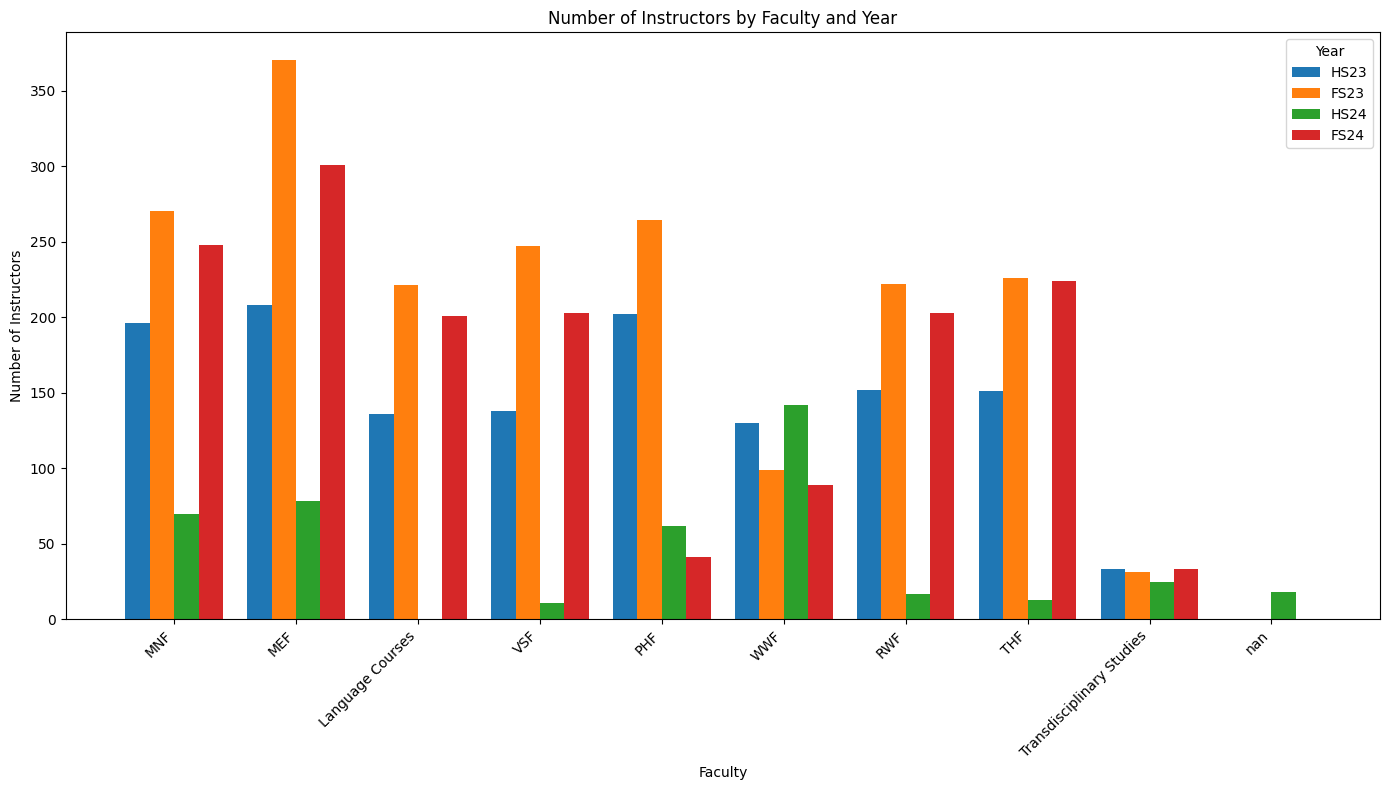

In [21]:
def faculty_info_with_instructors(graph, label, results):
    faculty_info = {}

    # counts
    for node, data in graph.nodes(data=True):
        if data.get("type") == "Faculty":
            # responsible instructors connected to "faculty"
            responsible_instructors = [
                neighbor for neighbor in graph.neighbors(node)
                if graph.nodes[neighbor].get("type") == "Responsible Instructor"
            ]

            # Count the instructors connected to their responsible instructors
            total_instructors = set()
            for responsible_instructor in responsible_instructors:
                instructors = [
                    neighbor for neighbor in graph.neighbors(responsible_instructor)
                    if graph.nodes[neighbor].get("type") == "Instructor"
                ]
                total_instructors.update(instructors)

            faculty_info[node] = len(total_instructors)

    results[label] = faculty_info

    print(f"Results for {label}:\n")
    for faculty, total_instructors in faculty_info.items():
        print(f"Faculty {faculty}: Total Instructors: {total_instructors}")
    print("\n")

results = {}
graphs = {"HS23": Graph_hs23, "FS23": Graph_fs23, "HS24": Graph_hs24, "FS24": Graph_fs24}

for label, graph in graphs.items():
    faculty_info_with_instructors(graph, label, results)

df = pd.DataFrame(results).fillna(0)

# bar graph
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
positions = range(len(df.index))

for i, year in enumerate(df.columns):
    ax.bar(
        [p + bar_width * i for p in positions],
        df[year],
        bar_width,
        label=year
    )

ax.set_xticks([p + bar_width * (len(df.columns) - 1) / 2 for p in positions])
ax.set_xticklabels(df.index, rotation=45, ha="right")
ax.set_ylabel("Number of Instructors")
ax.set_xlabel("Faculty")
ax.set_title("Number of Instructors by Faculty and Year")
ax.legend(title="Year")

plt.tight_layout()
plt.show()

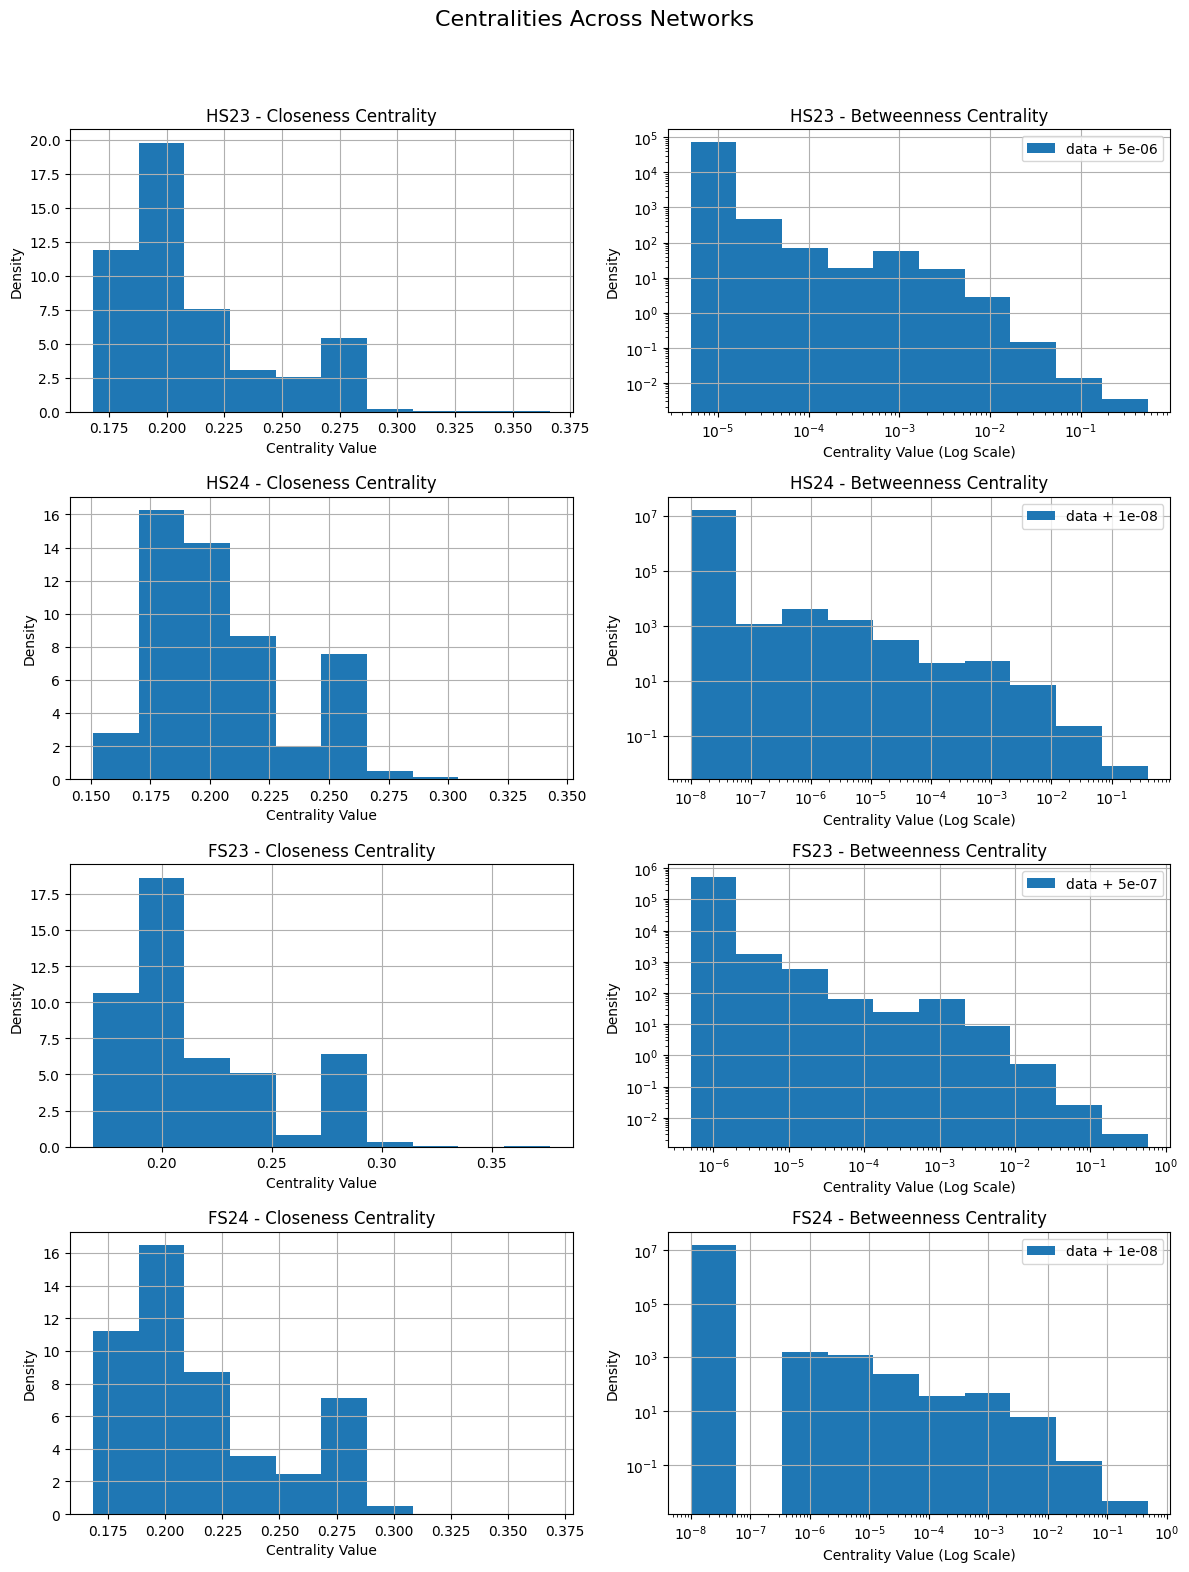

In [26]:
# compute centralities
def compute_centralities(G):
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    return [closeness, betweenness]

def get_log_bins(centralities, n_bins):
    min_c, max_c = min(centralities), max(centralities)
    return np.logspace(np.log10(min_c), np.log10(max_c), num=n_bins + 1)

# plot centrality distribution
def plot_centrality_distribution(centrality, axis, nbins, log_scale=False, delta=None):
    if delta is not None:
        centrality = [c + delta for c in centrality]
    if log_scale:
        bins = get_log_bins(centrality, nbins)
        axis.hist(centrality, bins=bins, density=True)
        axis.set_xscale("log")
        axis.set_yscale("log")
    else:
        axis.hist(centrality, bins=nbins, density=True)
    axis.grid()

num_datasets = 4
network_names = ["HS23", "HS24", "FS23", "FS24"]
graphs = [Graph_hs23, Graph_hs24, Graph_fs23, Graph_fs24]
deltas = [5e-6, 1e-8, 5e-7, 1e-8]
centrality_names = ["Closeness", "Betweenness"]

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle("Centralities Across Networks", fontsize=16)

nbins = 10
for i, (G, delta, name) in enumerate(zip(graphs, deltas, network_names)):
    centralities = compute_centralities(G)
    for j, (centrality, axis) in enumerate(zip(centralities, axes[i])):
        plot_centrality_distribution(
            list(centrality.values()), axis, nbins, log_scale=(j == 1), delta=delta
        )
        axis.set_title(f"{name} - {centrality_names[j]} Centrality")
        axis.set_xlabel("Centrality Value (Log Scale)" if j == 1 else "Centrality Value")
        axis.set_ylabel("Density")
        if j == 1:
            axis.legend([f"data + {delta}"], loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()